In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [157]:
data = pd.read_csv('../data/Mental_Health.csv')

data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [159]:
# Compruebo cuantas columnas tienen datos NaN
data.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [160]:
data = data.rename(columns={'Timestamp':'timestamp', 'Gender':'gender', 'Country':'country', 'Occupation':'occupation', 'Days_Indoors':'days_indoors', 'Growing_Stress':'growing_stress', 'Changes_Habits':'changes_habits', 'Mental_Health_History':'mh_history', 'Mood_Swings':'mood_swings', 'Coping_Struggles':'coping_struggles', 'Work_Interest':'work_interest', 'Social_Weakness':'social_weakness' })

In [161]:
# Elimino filas en las que haya datos que no esten
data.dropna(axis=0, inplace=True)

data.head()

,timestamp,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mh_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [162]:
# Convert timestamp into datetime format
data.timestamp = pd.to_datetime(data.timestamp)

# Extract year from timestamp
data['year'] = data.timestamp.dt.year

# Extract month from timestamp
data['month'] = data.timestamp.dt.month

data.head()

,timestamp,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mh_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,year,month
3,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,2014,8
4,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,2014,8
5,2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure,2014,8
6,2014-08-27 11:51:00,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,2014,8
7,2014-08-27 11:52:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,2014,8


In [163]:
data.drop(columns=['timestamp'], inplace=True)

data.head()


,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mh_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,year,month
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,2014,8
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,2014,8
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure,2014,8
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,2014,8
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,2014,8


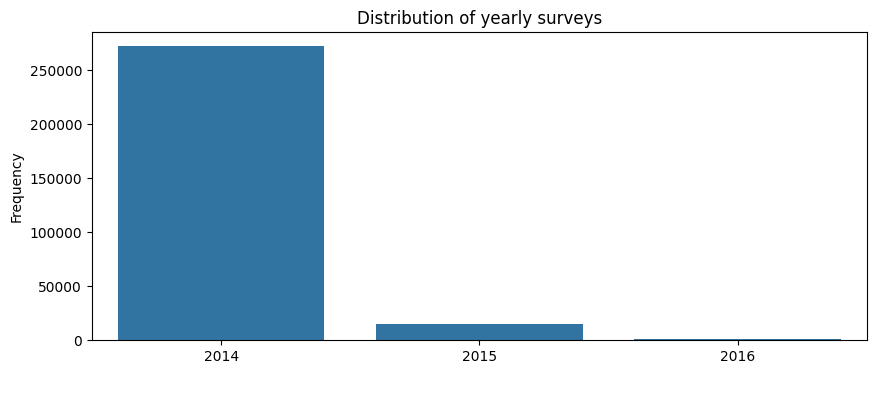

In [164]:
# Vamos a ver si hay muchas diferencias en los años en los que se han hecho los estudios para ver si hay que tenerlo en cuenta
plt.figure(figsize=(10, 4))
sns.countplot(x='year', data=data)
plt.title('Distribution of yearly surveys')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

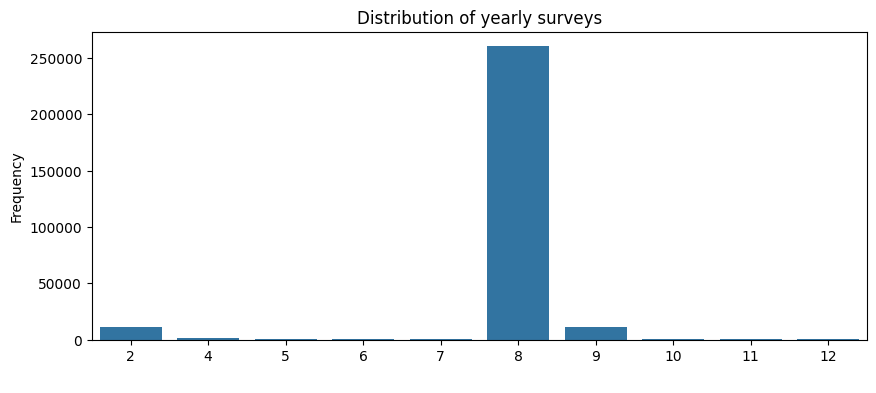

In [165]:
# Vamos a ver como es la distrubucion en meses para ver si podria afectar a los datos
plt.figure(figsize=(10, 4))
sns.countplot(x='month', data=data)
plt.title('Distribution of yearly surveys')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

# Casi todos estan hechos en agosto, despreciamos la fecha

In [166]:
data['country'].value_counts()

country
United States             168056
United Kingdom             50624
Canada                     17556
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Italy                       1560
Switzerland                 1560
Israel                      1560
Poland                       824
Belgium                      824
Russia                       780
Greece                       780
Denmark                      780
Singapore                    780
Portugal                     390
Costa Rica                   390
Nigeria                      390
Bosnia and Herzegovina       390
Finland                      390
Thailand                     390
Croatia                      390
Mexico                       390
Mo

In [167]:
data.apply(lambda x: x.unique())

gender                                                        [Female, Male]
country                    [United States, Poland, Australia, Canada, Uni...
occupation                 [Corporate, Student, Business, Housewife, Others]
self_employed                                                      [No, Yes]
family_history                                                     [Yes, No]
treatment                                                          [Yes, No]
days_indoors               [1-14 days, Go out Every day, More than 2 mont...
growing_stress                                              [Yes, No, Maybe]
changes_habits                                              [No, Yes, Maybe]
mh_history                                                  [Yes, No, Maybe]
mood_swings                                              [Medium, Low, High]
coping_struggles                                                   [No, Yes]
work_interest                                               [No, Maybe, Yes]

In [168]:
data.drop(data[data["growing_stress"] == "Maybe"].index, axis=0, inplace=True)
data.drop(data[data["changes_habits"] == "Maybe"].index, axis=0, inplace=True)
data.drop(data[data["mh_history"] == "Maybe"].index, axis=0, inplace=True)
data.drop(data[data["work_interest"] == "Maybe"].index, axis=0, inplace=True)
data.drop(data[data["social_weakness"] == "Maybe"].index, axis=0, inplace=True)
data.drop(data[data["mental_health_interview"] == "Maybe"].index, axis=0, inplace=True)
data.drop(data[data["care_options"] == "Not sure"].index, axis=0, inplace=True)

In [169]:
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Female' else 0)

yes_no_cols = ['self_employed', 'family_history', 'treatment', 'growing_stress', 'changes_habits', 'mh_history', 'mood_swings', 'coping_struggles', 'work_interest', 'social_weakness', 'mental_health_interview', 'care_options']

for column in yes_no_cols:
    data[column] = data[column].apply(lambda x: 1 if (x == 'Yes' or x == 'High') else 0 if (x == 'No' or x == 'Low') else 0.5)

data.head()

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mh_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,year,month
4,1,United States,Corporate,0,1,1,1-14 days,1,0,1,0.5,0,0,1,0,1,2014,8
7,1,United States,Corporate,0,0,0,1-14 days,1,0,1,0.5,0,0,1,0,0,2014,8
9,1,United States,Corporate,0,0,0,1-14 days,1,0,1,0.5,0,0,1,0,0,2014,8
12,1,United States,Corporate,0,0,0,1-14 days,1,0,1,0.5,0,0,1,0,0,2014,8
13,1,Canada,Corporate,0,1,1,1-14 days,1,0,1,0.5,0,0,1,0,1,2014,8


In [170]:
data[data['gender'] == 1]['treatment'].mean()

0.7638888888888888

In [171]:
data[data['gender'] == 0]['treatment'].mean()

0.5162162162162162

In [172]:
data[data['family_history'] == 1]['treatment'].mean()

0.7404027690371303

In [173]:
data[data['family_history'] == 0]['treatment'].mean()

0.42073447181502194

In [174]:
data['mh_history'].value_counts()

mh_history
0    11800
1    10968
Name: count, dtype: int64

In [175]:
import scipy.stats as stats
t_w = data[data['gender']==0]['treatment']
t_m = data[data['gender']==1]['treatment']

ttest = stats.ttest_ind(t_w, t_m)
print(ttest)

TtestResult(statistic=-27.66152367617496, pvalue=1.110340419793609e-165, df=22766.0)


In [176]:
data.groupby("occupation")['gender'].value_counts()

occupation  gender
Business    0         4070
            1          648
Corporate   0         3330
            1          648
Housewife   0         5180
            1          720
Others      0         4810
            1          720
Student     0         1850
            1          792
Name: count, dtype: int64

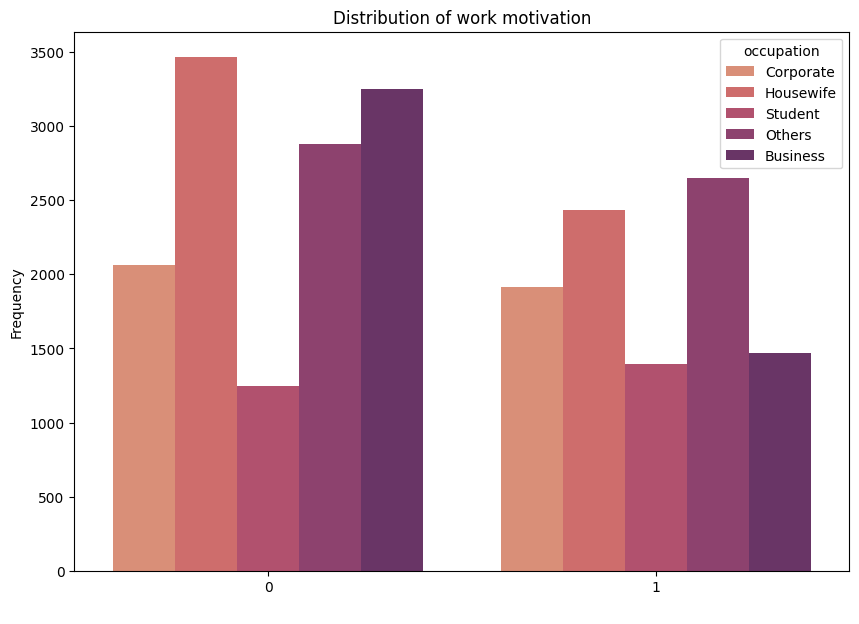

In [177]:
# Visualise the proportion of work interest for every occupation
plt.figure(figsize=(10, 7))
sns.countplot(x='work_interest', data=data, palette = 'flare', hue='occupation')
plt.title('Distribution of work motivation')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

In [178]:
data.head(15)

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mh_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,year,month
4,1,United States,Corporate,0,1,1,1-14 days,1,0,1,0.5,0,0,1,0,1,2014,8
7,1,United States,Corporate,0,0,0,1-14 days,1,0,1,0.5,0,0,1,0,0,2014,8
9,1,United States,Corporate,0,0,0,1-14 days,1,0,1,0.5,0,0,1,0,0,2014,8
12,1,United States,Corporate,0,0,0,1-14 days,1,0,1,0.5,0,0,1,0,0,2014,8
13,1,Canada,Corporate,0,1,1,1-14 days,1,0,1,0.5,0,0,1,0,1,2014,8
17,1,South Africa,Corporate,1,1,1,1-14 days,1,0,1,0.5,0,0,1,0,1,2014,8
19,1,United States,Corporate,0,1,1,1-14 days,1,0,1,0.5,0,0,1,0,0,2014,8
20,1,United States,Corporate,0,0,0,1-14 days,1,0,1,0.5,0,0,1,0,1,2014,8
21,1,Canada,Corporate,0,1,1,1-14 days,1,0,1,0.5,0,0,1,0,1,2014,8
23,1,United States,Corporate,0,0,1,1-14 days,1,0,1,0.5,0,0,1,0,0,2014,8


In [179]:
data = data.drop(data[data["treatment"] == 3].index)

for col in data.columns:
    print(data.groupby(col)['treatment'].mean())

gender
0    0.516216
1    0.763889
Name: treatment, dtype: float64
country
Australia         0.700587
Brazil            0.500000
Canada            0.515528
Colombia          0.000000
Croatia           1.000000
Finland           0.000000
France            0.000000
Georgia           0.000000
Germany           0.500000
Greece            0.000000
India             0.500000
Ireland           0.504854
Israel            0.000000
Italy             0.000000
Mexico            0.000000
Moldova           1.000000
Netherlands       0.168285
New Zealand       1.000000
Nigeria           0.000000
Philippines       0.000000
Poland            1.000000
Portugal          0.000000
Russia            0.000000
Singapore         0.000000
South Africa      0.595331
Sweden            0.500000
Switzerland       0.333333
United Kingdom    0.534530
United States     0.611153
Name: treatment, dtype: float64
occupation
Business     0.550233
Corporate    0.556561
Housewife    0.546441
Others       0.548463
Student    

In [180]:
data[data['country'] == "Belgium"]['treatment']
data[data['country'] == "Belgium"]['care_options'].value_counts()

Series([], Name: count, dtype: int64)

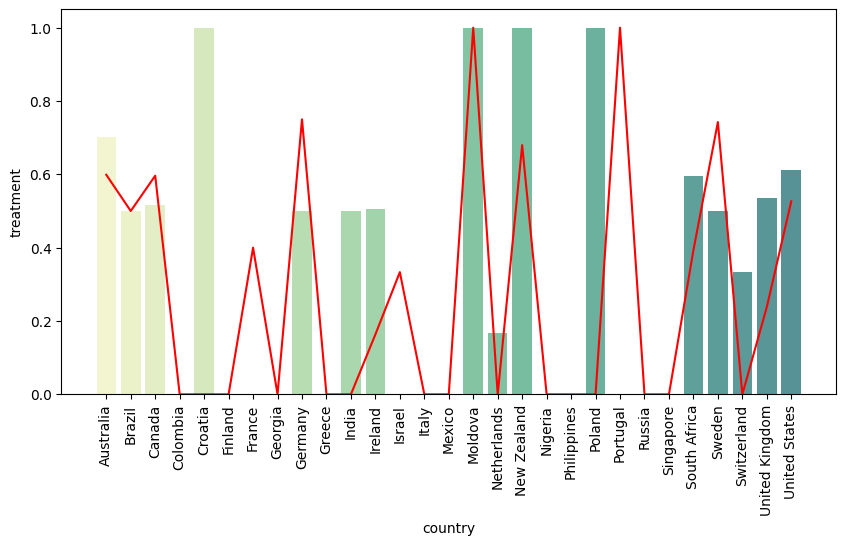

In [187]:
plt.figure(figsize=(10, 5))
graph_data = data.groupby("country")['treatment'].mean()

palette = sns.color_palette("cmo.deep", n_colors=64, desat=1)
my_plot = sns.barplot(data=graph_data, palette=palette)
sns.lineplot(data= data.groupby("country")['care_options'].mean(), color='red')

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90);





In [ ]:
data.groupby("country")["care_options"].value_counts()

Country         care_options
Australia       1                306
                0                205
Brazil          0                104
                1                104
Canada          1                768
                0                520
Colombia        0                 52
Croatia         0                 52
Finland         0                 52
France          0                156
                1                104
Georgia         0                 52
Germany         1                156
                0                 52
Greece          0                104
India           0                104
Ireland         0                517
                1                101
Israel          0                104
                1                 52
Italy           0                104
Mexico          0                 52
Moldova         1                 52
Netherlands     0                309
New Zealand     1                104
                0                 49
Nigeria  

Gender: 1 --> 0.7638888888888888
Gender: 0 --> 0.5162162162162162
Country: United States --> 0.6111533201641088
Country: Canada --> 0.515527950310559
Country: South Africa --> 0.5953307392996109
Country: Sweden --> 0.5
Country: United Kingdom --> 0.5345303867403315
Country: Australia --> 0.700587084148728
Country: New Zealand --> 1.0
Country: Netherlands --> 0.16828478964401294
Country: Ireland --> 0.5048543689320388
Country: Portugal --> 0.0
Country: France --> 0.0
Country: Brazil --> 0.5
Country: Russia --> 0.0
Country: Switzerland --> 0.3333333333333333
Country: Germany --> 0.5
Country: Finland --> 0.0
Country: Israel --> 0.0
Country: Italy --> 0.0
Country: Singapore --> 0.0
Country: Nigeria --> 0.0
Country: Croatia --> 1.0
Country: Mexico --> 0.0
Country: India --> 0.5
Country: Greece --> 0.0
Country: Moldova --> 1.0
Country: Colombia --> 0.0
Country: Georgia --> 0.0
Country: Philippines --> 0.0
Country: Poland --> 1.0
Occupation: Corporate --> 0.5565610859728507
Occupation: Housew

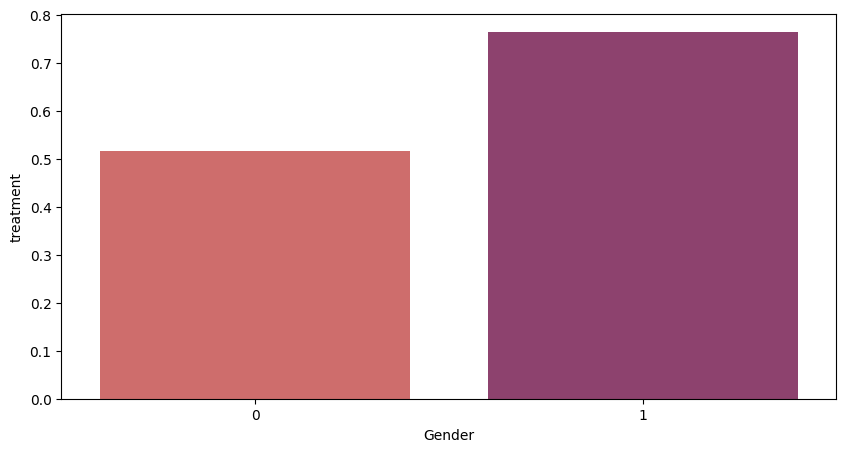

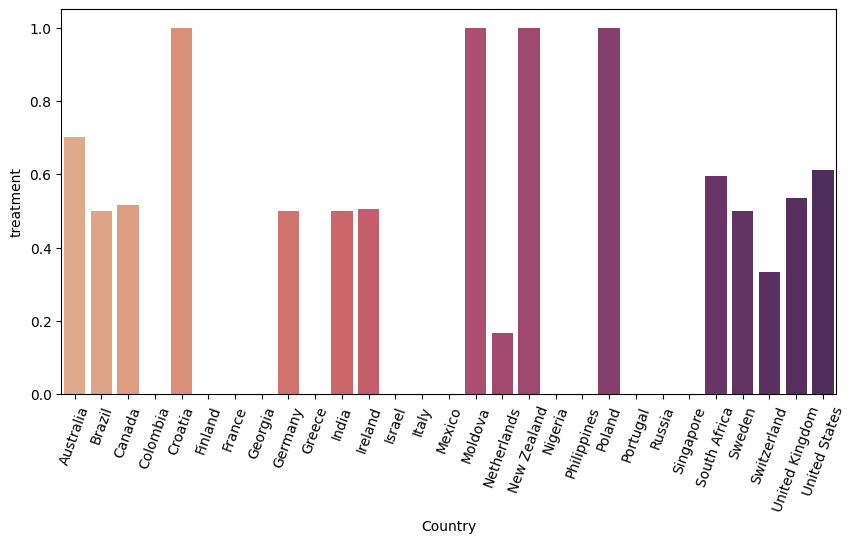

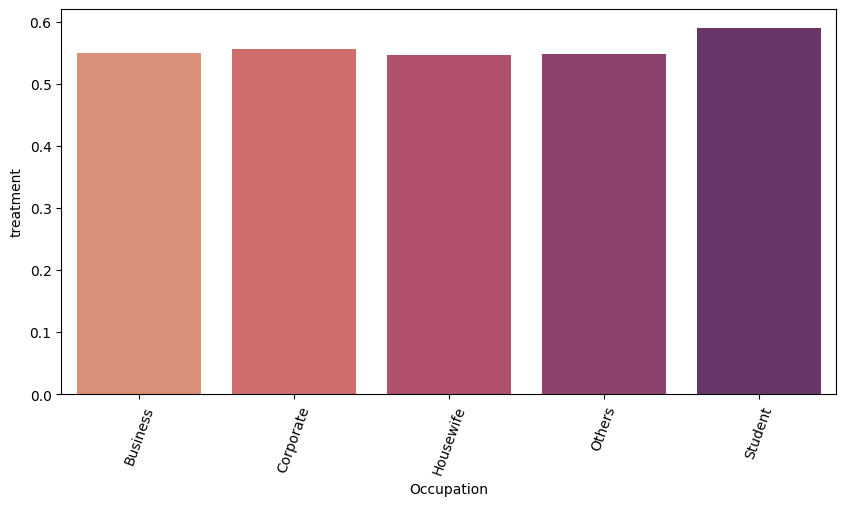

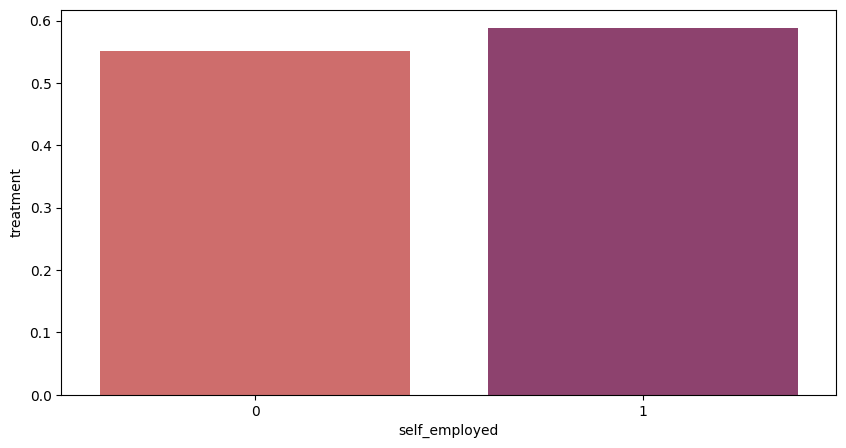

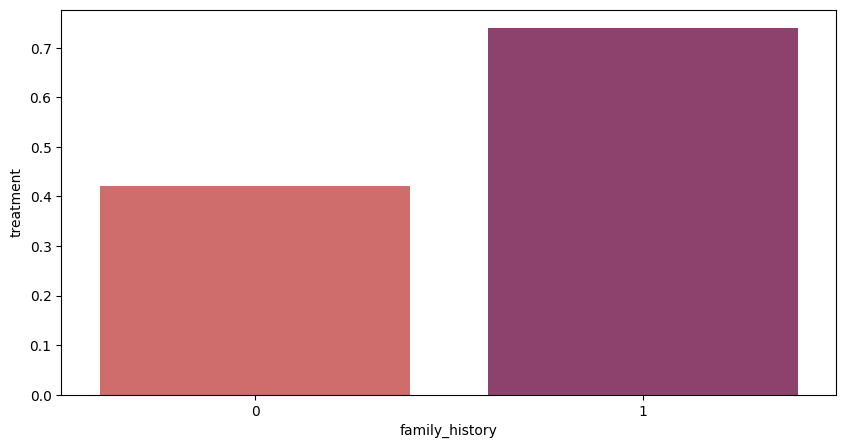

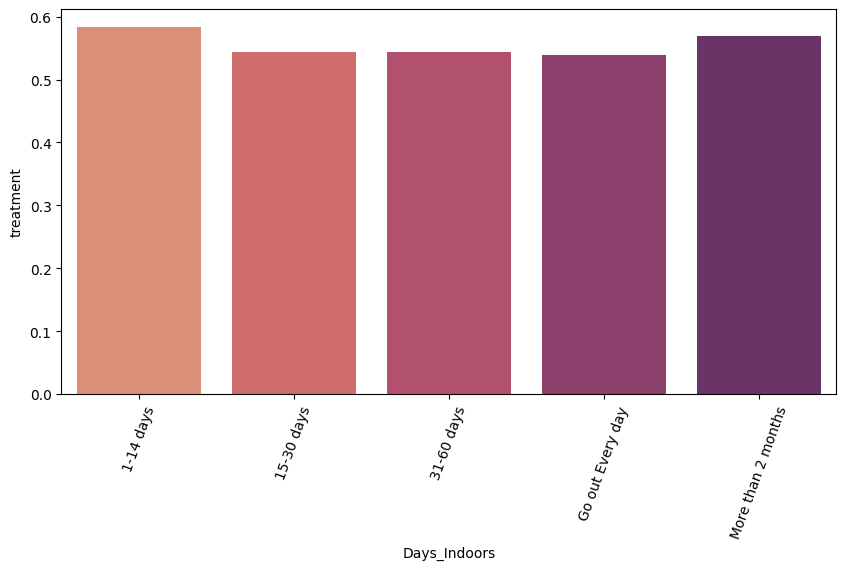

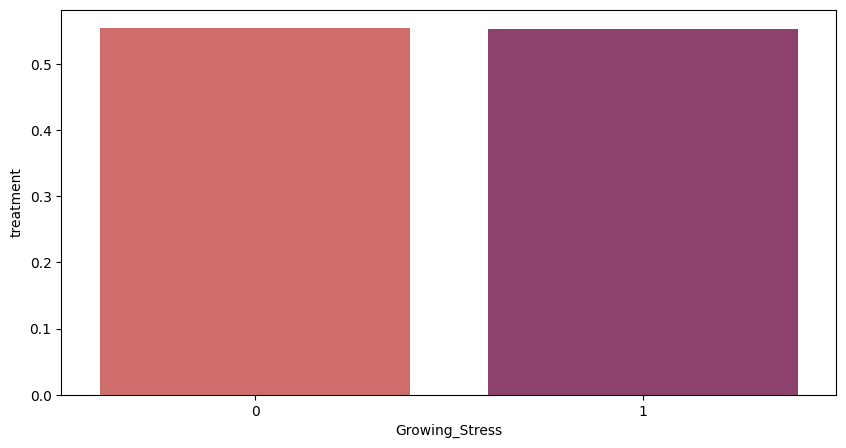

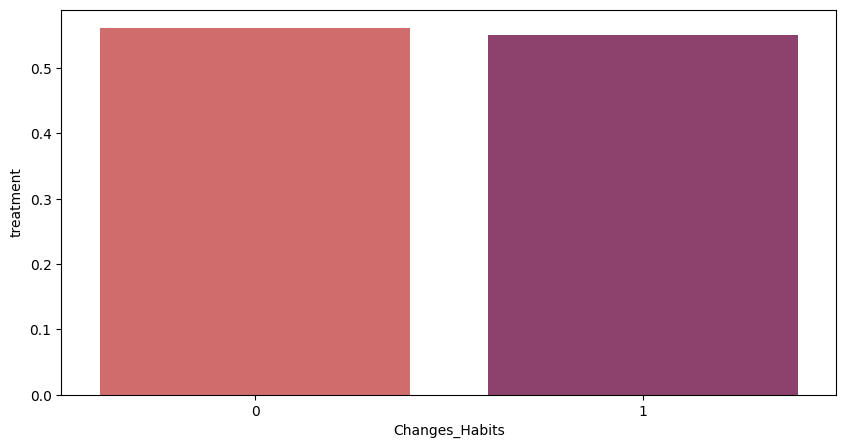

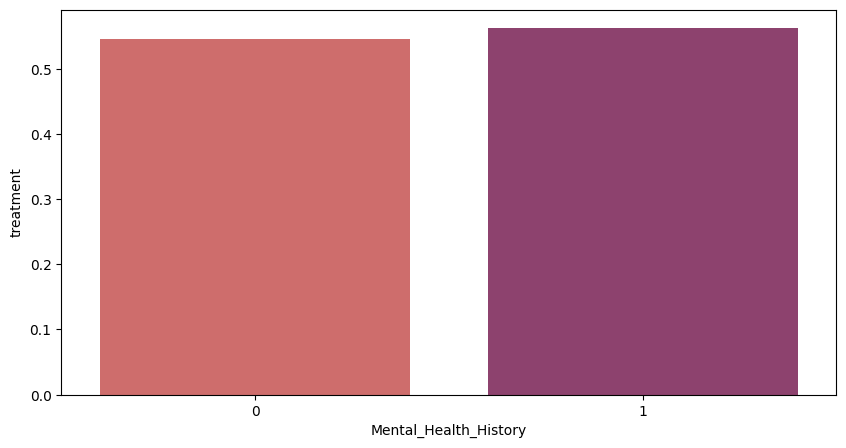

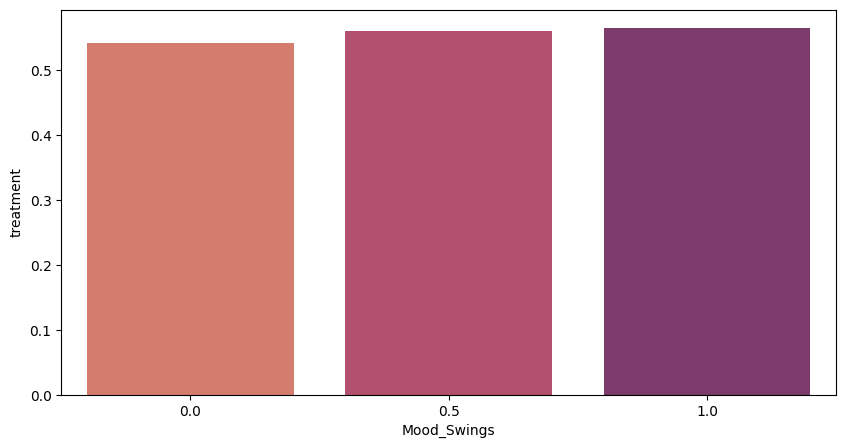

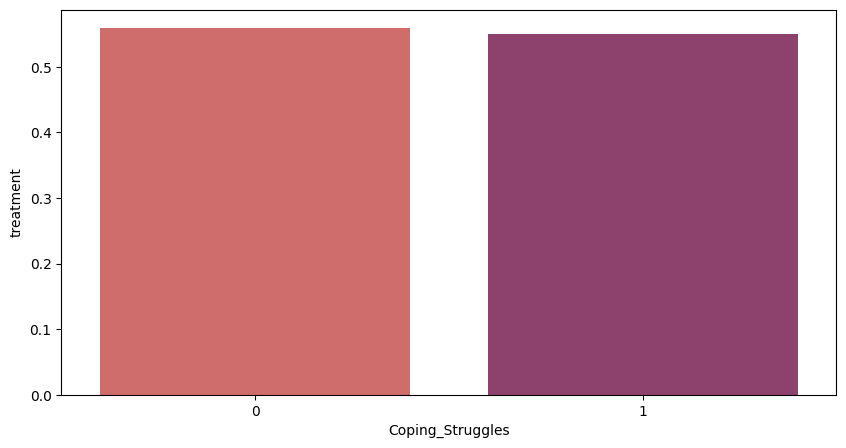

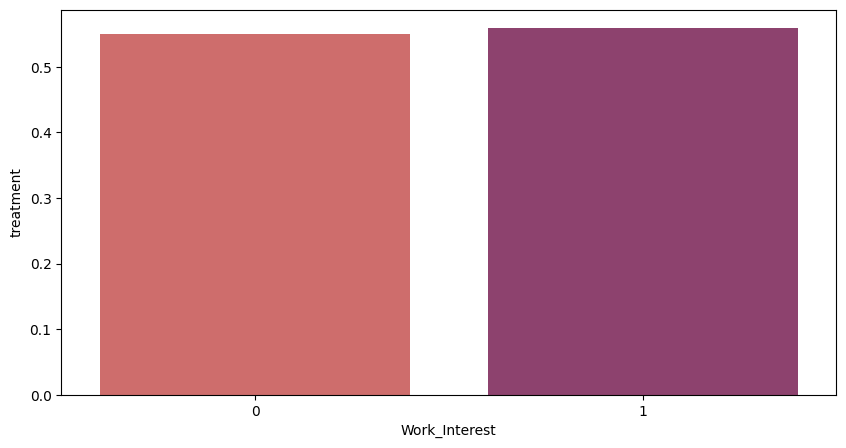

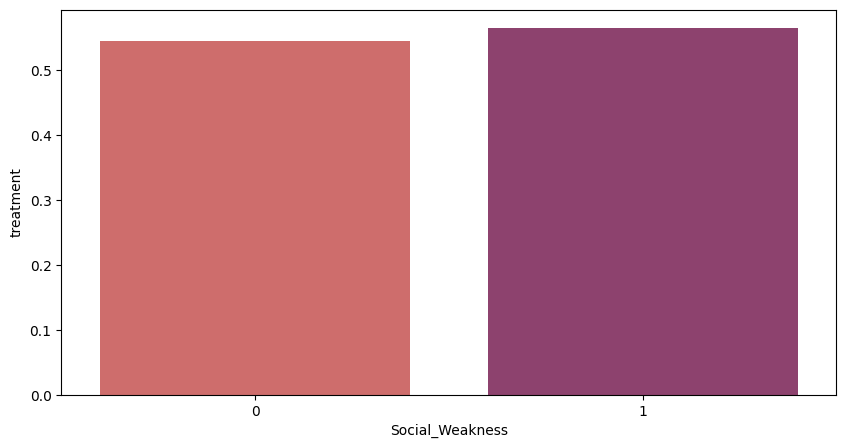

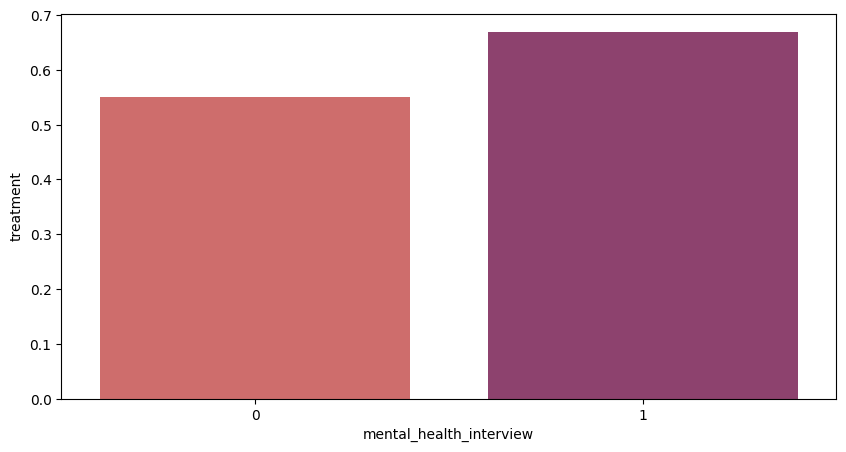

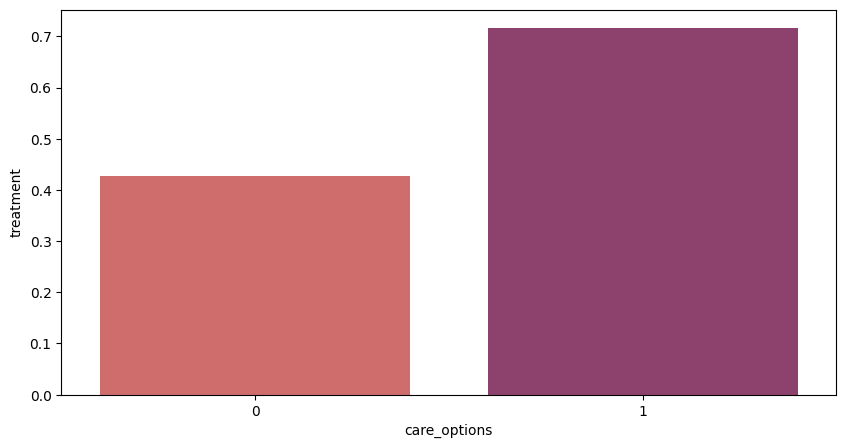

In [ ]:
for col in data.columns:
    if col != "treatment":
        plt.figure(figsize=(10, 5))
        if data.dtypes[col] == "object":
            plt.xticks(rotation=70)
        sns.barplot(data.groupby(col)['treatment'].mean(), palette="flare")
    
    for elm in data[col].unique():
        print(f"{col}: {elm} -->", data[data[col] == elm]['treatment'].mean())


In [ ]:
data_students = data[data["occupation"] == "Student"]

data_students.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
8474,1,United States,Student,0,1,1,1-14 days,1,1,0,0.0,1,0,1,0,1
8477,1,United States,Student,0,0,0,1-14 days,1,1,0,0.0,1,0,1,0,0
8479,1,United States,Student,0,0,0,1-14 days,1,1,0,0.0,1,0,1,0,0
8482,1,United States,Student,0,0,0,1-14 days,1,1,0,0.0,1,0,1,0,0
8483,1,Canada,Student,0,1,1,1-14 days,1,1,0,0.0,1,0,1,0,1


Gender: 1 --> 0.7638888888888888
Gender: 0 --> 0.5162162162162162
Country: United States --> 0.6487341772151899
Country: Canada --> 0.5973154362416108
Country: South Africa --> 0.6774193548387096
Country: Sweden --> 0.5
Country: United Kingdom --> 0.5576923076923077
Country: Australia --> 0.6911764705882353
Country: New Zealand --> 1.0
Country: Netherlands --> 0.1388888888888889
Country: Ireland --> 0.4166666666666667
Country: Portugal --> 0.0
Country: France --> 0.0
Country: Brazil --> 0.5
Country: Russia --> 0.0
Country: Switzerland --> 0.3333333333333333
Country: Germany --> 0.5
Country: Finland --> 0.0
Country: Israel --> 0.0
Country: Italy --> 0.0
Country: Singapore --> 0.0
Country: Nigeria --> 0.0
Country: Croatia --> 1.0
Country: Mexico --> 0.0
Country: India --> 0.5
Country: Greece --> 0.0
Country: Moldova --> 1.0
Country: Colombia --> 0.0
Country: Georgia --> 0.0
Country: Philippines --> 0.0
Country: Poland --> 1.0
Occupation: Student --> 0.5904617713853142
self_employed: 0 --

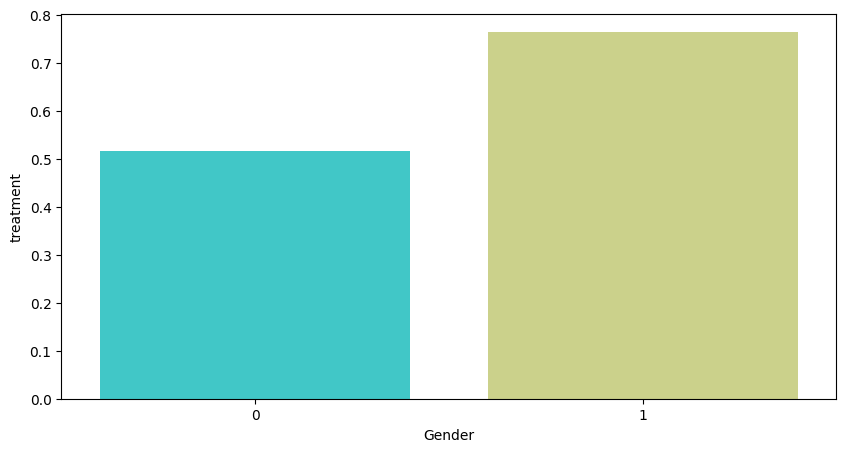

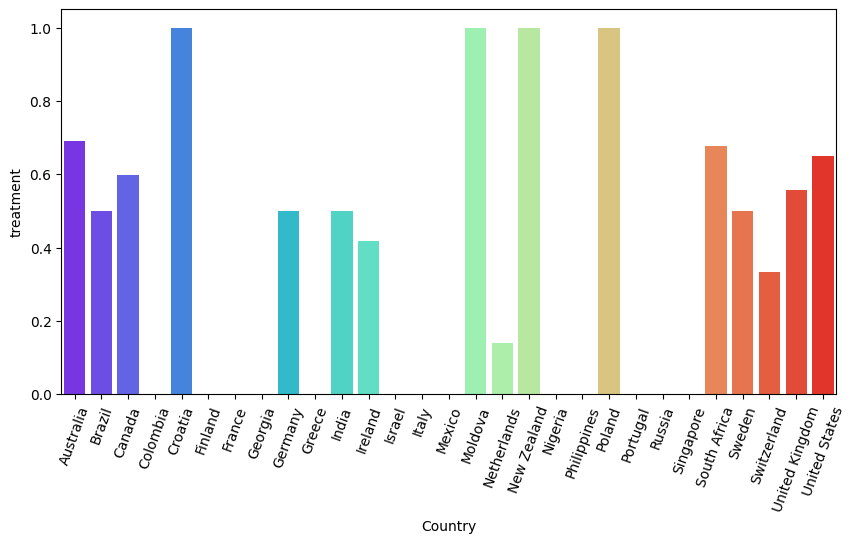

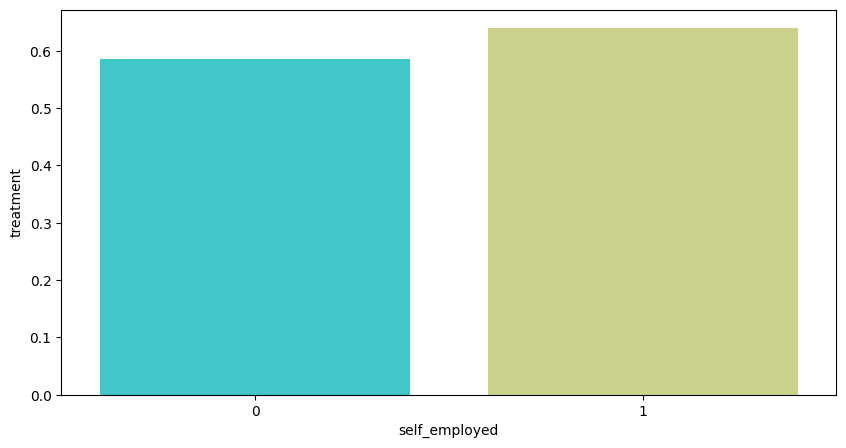

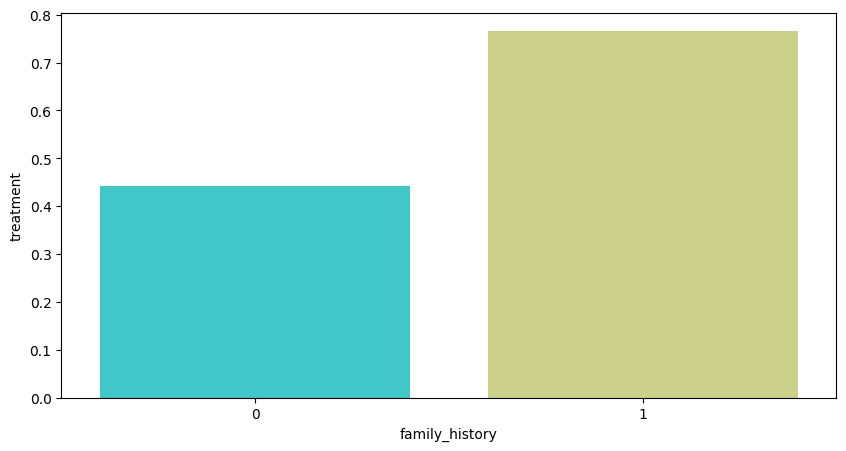

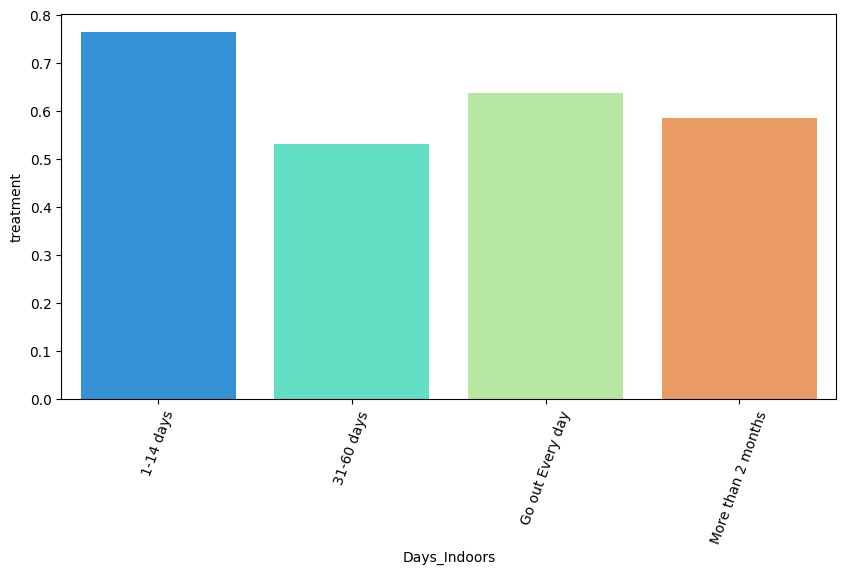

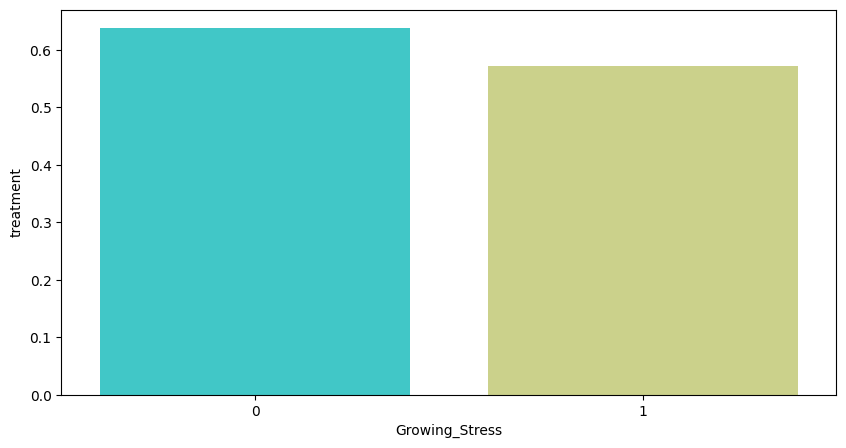

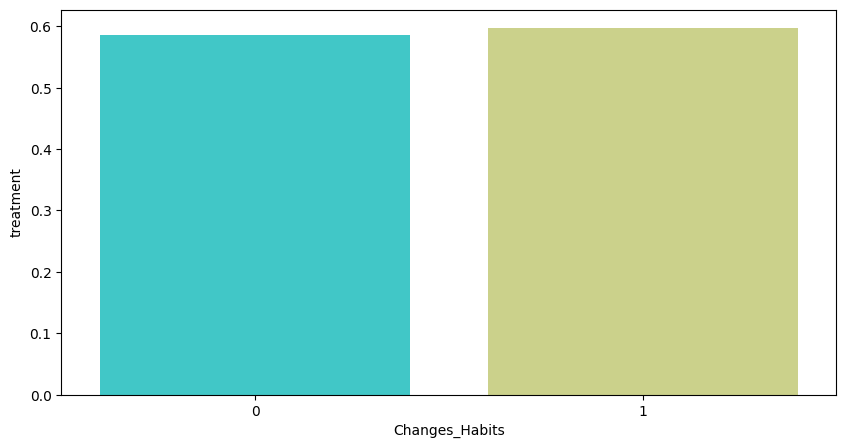

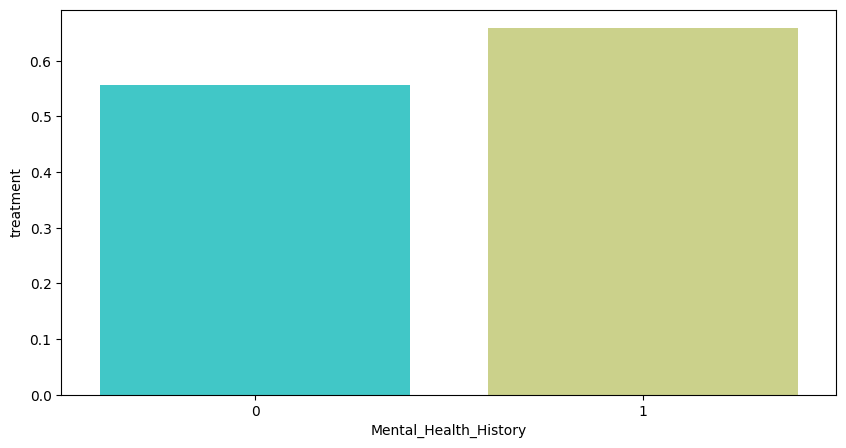

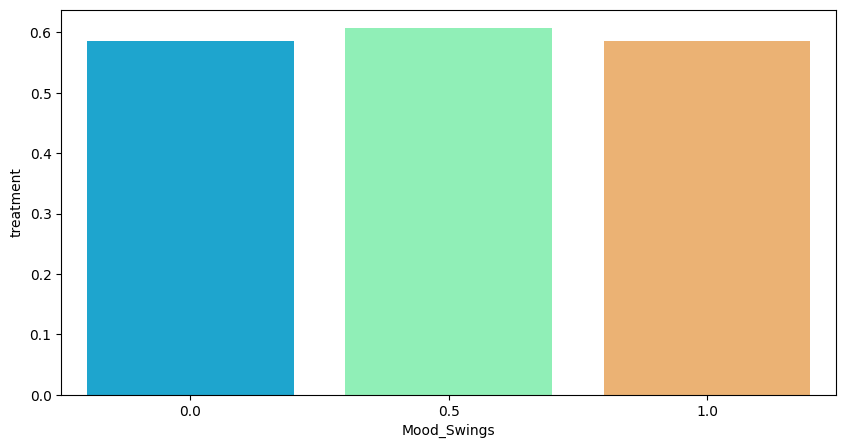

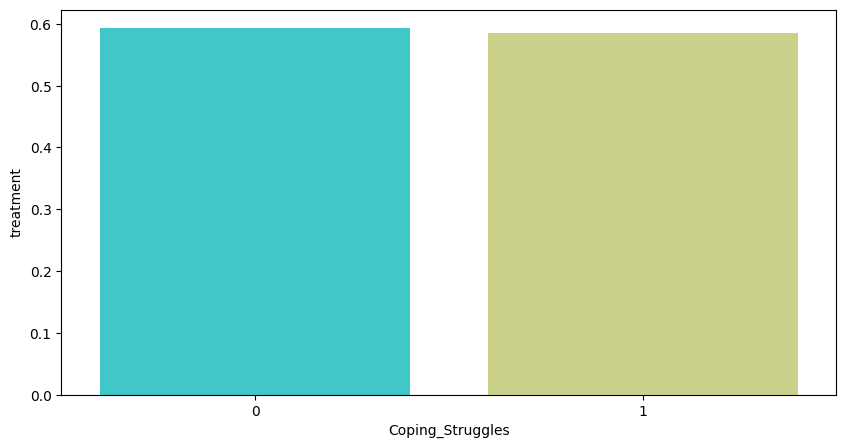

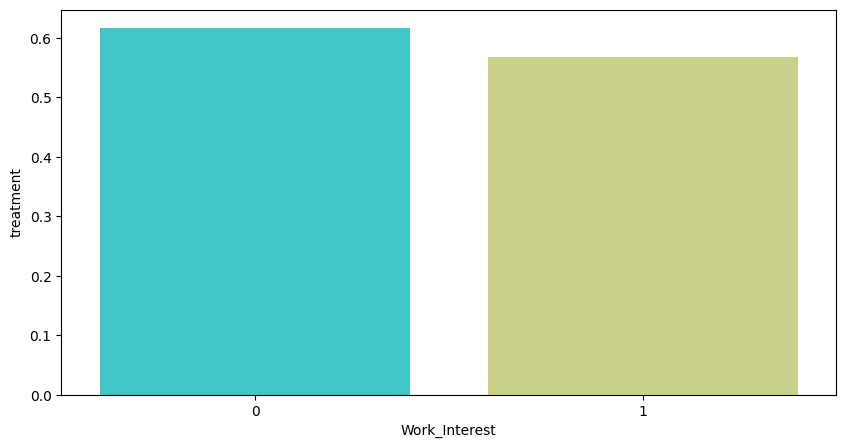

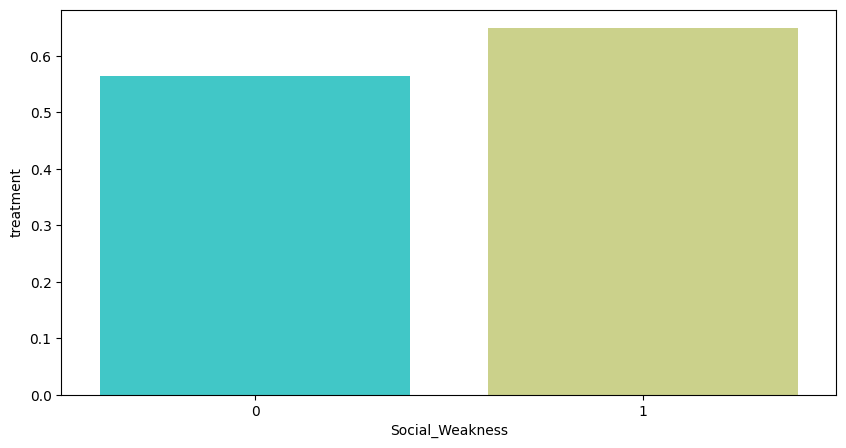

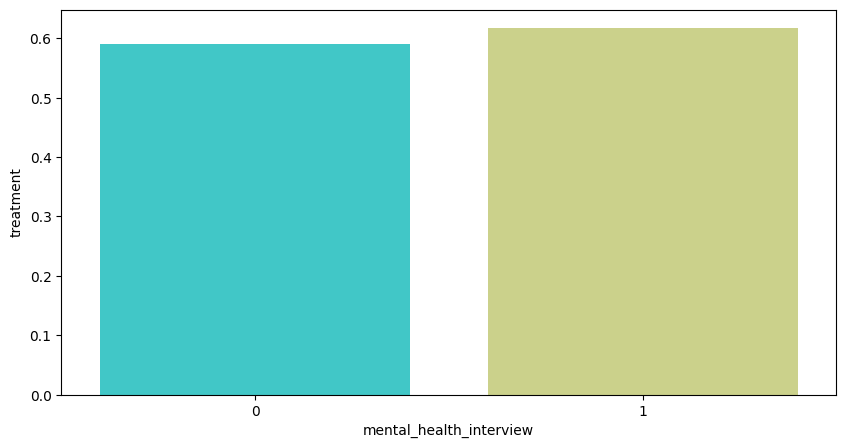

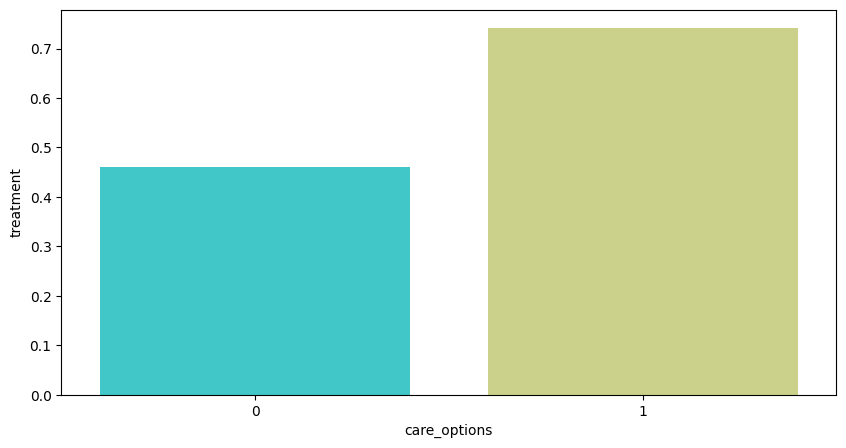

In [ ]:
for col in data_students.columns:
    if col != "treatment" and col != "occupation":
        plt.figure(figsize=(10, 5))
        if data_students.dtypes[col] == "object":
            plt.xticks(rotation=70)
        sns.barplot(data_students.groupby(col)['treatment'].mean(), palette="rainbow")
    
    for elm in data_students[col].unique():
        print(f"{col}: {elm} -->", data_students[data_students[col] == elm]['treatment'].mean())

In [ ]:
data_students["treatment"].mean()

0.5904617713853142

In [ ]:
group_occ = data.groupby('occupation')['treatment']
data["occupation"].unique()

corporate = group_occ.get_group('Corporate')
student = group_occ.get_group('Student')
business = group_occ.get_group('Business')
housewife = group_occ.get_group('Housewife')
others = group_occ.get_group('Others')

anova = stats.f_oneway(corporate, student, business, housewife, others)
print(anova)

if anova[1] < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la cantidad de personas que buscan tratamiento entre las diferentes profesiones"')
else:
    print('No rechazamos la hipótesis nula')

F_onewayResult(statistic=4.155765715664274, pvalue=0.0022929958230563322)
Rechazamos la hipótesis nula "No hay evidencia significativa en la cantidad de personas que buscan tratamiento entre las diferentes profesiones"


In [ ]:
trat = data["treatment"]
occu = data['family_history']

correlacion , pv = stats.pearsonr(trat, occu)
print(correlacion, pv)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre el historial familiar y el tratamiento"')
else:
    print('No rechazamos la hipótesis nula')

0.3173161855860511 0.0
Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre el historial familiar y el tratamiento"


In [ ]:
trat = data["treatment"]
occu = data['care_options']

correlacion , pv = stats.pearsonr(trat, occu)
print(correlacion, pv)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre el tratamiento y la opcion a cuidados"')
else:
    print('No rechazamos la hipótesis nula')

0.28864841642625233 0.0
Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre el tratamiento y la opcion a cuidados"


In [ ]:
trat = data["growing_stress"]
occu = data['gender']

correlacion , pv = stats.pearsonr(trat, occu)
print(correlacion, pv)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre el tratamiento y la opcion a cuidados"')
else:
    print('No rechazamos la hipótesis nula')

-0.005696535089666575 0.39005706284655
No rechazamos la hipótesis nula


In [ ]:
# sns.barplot(data=data["Gender"].apply(lambda x: x / x.mean())["Growing_Stress"].mean())

men = data["gender"].value_counts().loc[0] / len(data)
women = data["gender"].value_counts().loc[1] / len(data)

data["gender"].mean()


0.15495432185523542